In [1]:
from cvfwVer2 import Weight
import cv2
import matplotlib.pyplot as plt
from os import listdir
import numpy as np

#### standard_deviation function
- data analysis
- 정확도가 잘 나와주었던 데이터셋들과 비교적 낮은 정확도를 보여준 데이터셋들의 가중치분포 차이 분석

In [2]:
def standard_deviation(m, n, directory, name):
    weights = []

    files = listdir(directory)

    for f in files:
        img = cv2.resize((cv2.cvtColor(cv2.imread(f"{directory}\\{f}"), cv2.COLOR_BGR2GRAY)), dsize=(m, n)).flatten().tolist()

        w = Weight(m, n, img)
        weights.append(w)
        
    data = np.zeros([m*n, 2, len(files)])

    
    for i in range(m*n):
        for j in range(2):
            count = 0
            for w in weights:
                data[i][j][count] = w[i][j]
                count += 1
                
    standard_deviation = np.zeros([m*n, 2])

    for i in range(m*n):
        for j in range(2):
            standard_deviation[i][j] = np.std(data[i][j])
            
            
    x = [i for i in range(m*n)]
    right_y = [i[0] for i in standard_deviation]
    down_y = [i[1] for i in standard_deviation]

    plt.figure(figsize = (5, 5))
    
    plt.scatter(x, right_y, color="red", label="Right Weight Standard Deviation")
    plt.scatter(x, down_y, color="blue", label="Down Weight Standard Deviation")
    plt.legend()
    plt.title(name)

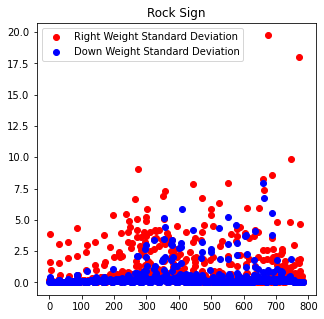

In [3]:
standard_deviation(28, 28, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\A", "Rock Sign")

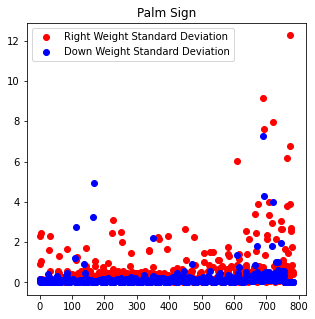

In [4]:
standard_deviation(28, 28, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\B", "Palm Sign")

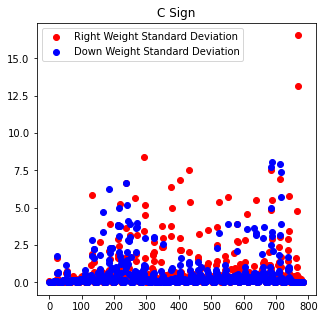

In [5]:
standard_deviation(28, 28, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\C", "C Sign")

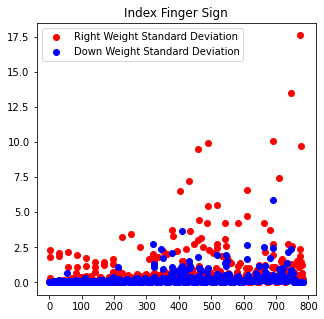

In [6]:
standard_deviation(28, 28, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\D", "Index Finger Sign")

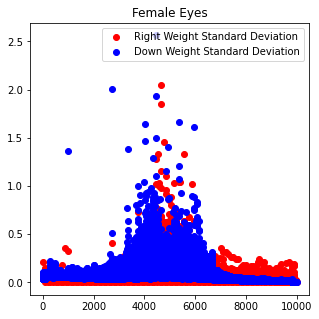

In [7]:
standard_deviation(100, 100, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\eyes\\femaleeyes", "Female Eyes")

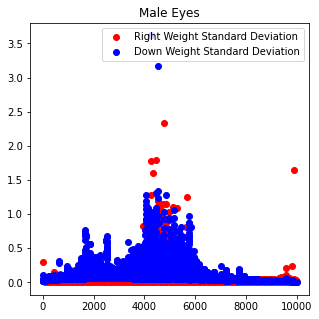

In [8]:
standard_deviation(100, 100, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\eyes\\maleeyes", "Male Eyes")

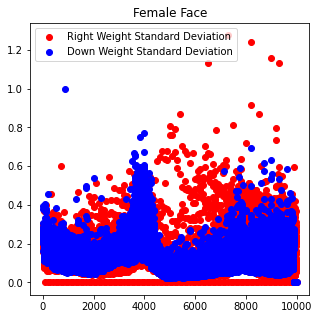

In [9]:
standard_deviation(100, 100, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\femaleface", "Female Face")

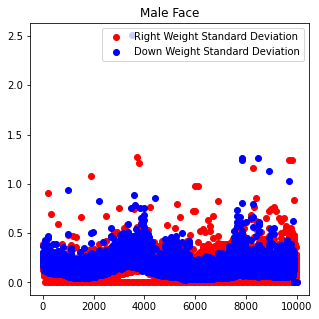

In [10]:
standard_deviation(100, 100, "C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\maleface", "Male Face")

## 결론
- 비교적 좋은 accuracy 를 보여준 데이터셋들의 가중치의 표준편차를 시각화하였을때 산점도의 분포가 몇개의 이상치데이터를 제외하고는 원만하게 아래쪽에 분포되어 있는 모습을 볼 수 있다.

- 비교적 좋지 못한 accuracy 를 보여준 데이터셋들의 가중치의 표준편차를 시각화하였을때 산점도의 분포가 원만하지 않게 분포되어 있는 모습을 볼 수 있다.